# Capstone Project 1: Data Exploration

In [1]:
import pandas as pd #for building pandas dataframes for analysis

import glob, os #for reading file names

import numpy as np #fundamental package for scientific computing with Python

from sklearn.feature_extraction.text import CountVectorizer #bag of word analysis

import seaborn as sns #for neat visualizations

import matplotlib.pyplot as plt #for visualizations

import statsmodels.api as sm #provides estimation of many different statistical models, tests and data exploration 

from statsmodels.formula.api import ols #to calculate ordinary least squares

from sklearn.model_selection import train_test_split #for performing train test split analysis

from sklearn.linear_model import LinearRegression #for performing linear regression

import scipy.stats as stats #large number of probability distributions and statistical functions

import pylab

from pylab import xticks


/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Cleaned Data w/o Accommodation
filtered_result4 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/AirBNB_cleaned_dataChicagoprice_filtered_result_2_2018-07-20.csv')
filtered_result4.head()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,3.0,2.0,5.0,98.0,186,1,0,0
1,4.0,4.0,4.5,296.0,46,1,0,0
2,1.0,3.0,5.0,108.0,50,1,0,0
3,1.0,4.0,4.5,217.0,9,1,0,0
4,3.0,1.0,4.5,433.0,34,1,0,0


# Inferential Statistics

#### Create a Scatterplot Matrix of the new filtered dataframe filtered_result

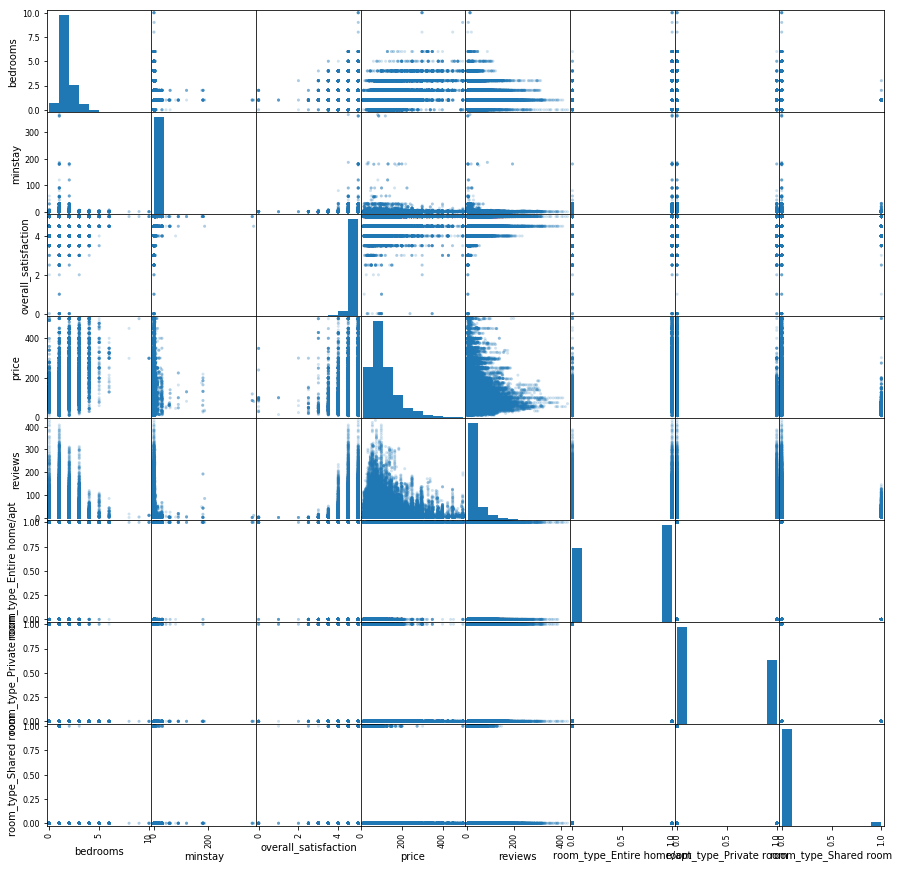

In [3]:
pd.plotting.scatter_matrix(filtered_result4, alpha=0.2, figsize=(15,15))
plt.show()

After the data was cleaned I created a scatterplot matrix and heatmap without the neighborhood categorical data to get an initial overview of the data set (neighborhood data would crowd the overview). The scatterplot matrix does not show any strong distinct trends we can make assumptions on. Further investigation is needed.

#### Create a Correlation Heat Map of the filtered dataframe

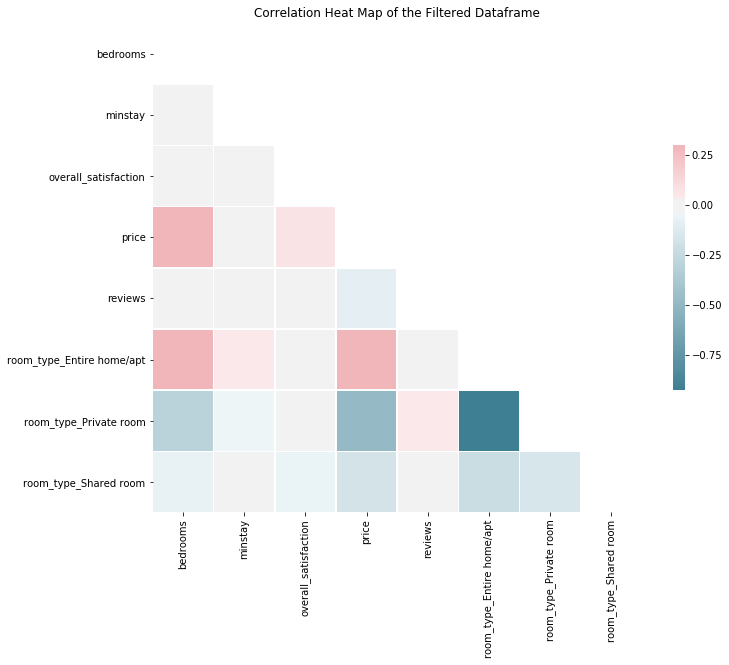

In [4]:
corr = filtered_result4.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heat Map of the Filtered Dataframe')
plt.show()

The correlation heatmap shows which variables have what impact on each other. We can focus on our variable of choice, the price. The price shows to have a slight positive impact on entire house/apt. Shared room type, private room type and reviews show a negative influence on the price variable.

In [5]:
corr_matrix = filtered_result4.corr()
corr_matrix["price"].sort_values(ascending=False)

price                        1.000000
room_type_Entire home/apt    0.540023
bedrooms                     0.490365
overall_satisfaction         0.071880
minstay                      0.017844
reviews                     -0.084265
room_type_Shared room       -0.176812
room_type_Private room      -0.479800
Name: price, dtype: float64

#### Calculate Price Per bedroom, Pearson Coefficient & Analyze with OLS

In [30]:
# Replace bedrooms with zero rooms (studios) with 1.0 to calculate price per rooms
filtered_result4['bedrooms'] = filtered_result4['bedrooms'].replace(to_replace=0,value=1)
filtered_result4['price_per_bedroom'] = filtered_result4['price']/filtered_result4['bedrooms']
filtered_result4.head()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price_per_bedroom
0,3.0,2.0,5.0,98.0,186,1,0,0,32.666667
1,4.0,4.0,4.5,296.0,46,1,0,0,74.000000
2,1.0,3.0,5.0,108.0,50,1,0,0,108.000000
3,1.0,4.0,4.5,217.0,9,1,0,0,217.000000
4,3.0,1.0,4.5,433.0,34,1,0,0,144.333333


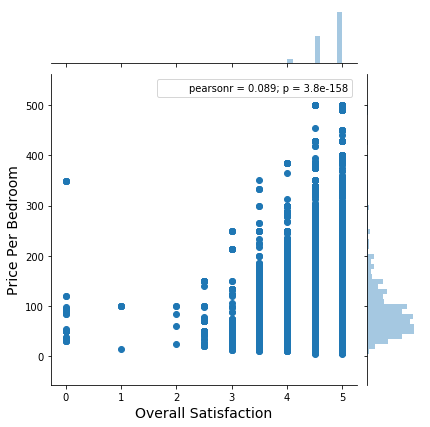

In [31]:
#Pearson correlation chart of price per bedroom vs. overall satisfaction
fig = sns.jointplot(filtered_result4['overall_satisfaction'], filtered_result4['price_per_bedroom'])
plt.margins(0.125)
fig.set_axis_labels('Overall Satisfaction', 'Price Per Bedroom', fontsize=14)
plt.show()

In [32]:
filtered_result4['price_per_bedroom'].groupby(filtered_result4['overall_satisfaction']).describe()

,count,mean,std,min,25%,50%,75%,max
overall_satisfaction,,,,,,,,
0.0,36.0,108.583333,101.256499,30.000000,50.000000,88.0,95.000,349.0
1.0,6.0,85.833333,34.701105,15.000000,100.000000,100.0,100.000,100.0
2.0,5.0,74.000000,31.898276,25.000000,60.000000,85.0,100.000,100.0
2.5,54.0,69.398148,39.983768,20.000000,46.250000,50.0,93.625,150.0
3.0,162.0,66.424383,54.970062,13.000000,33.000000,50.0,65.500,249.5
3.5,928.0,75.100395,49.848518,11.000000,40.000000,59.5,100.000,350.0
4.0,4470.0,76.107934,47.401219,10.000000,44.000000,65.0,97.875,385.0
4.5,29693.0,82.455397,49.828630,5.333333,49.000000,72.0,100.000,500.0
5.0,55001.0,90.515621,48.133844,5.000000,58.333333,79.5,111.000,500.0


In [33]:
m = ols('price ~ bedrooms',filtered_result4).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                 3.667e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:41:41   Log-Likelihood:            -5.0374e+05
No. Observations:               90355   AIC:                         1.007e+06
Df Residuals:                   90353   BIC:                         1.007e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.9081      0.474     67.271      0.0

Interpreting coefficients
There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the bedrooms coefficient (60.1585) by first noticing that the p-value (under P>|t|) is zero. This means that the number of rooms, RM, is a statistically significant predictor of PRICE. 

The regression coefficient for RM of 60.1585 means that on average, each additional room is associated with an increase of 60.1585 in price net of the other variables. 

The confidence interval gives us a range of plausible values for this average change, about 59.543 - 60.774, which is a pretty narrow.

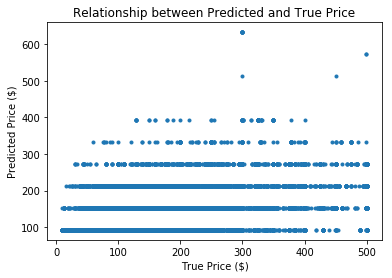

In [34]:
plt.plot(filtered_result4['price'], m.fittedvalues, marker='.', linestyle='none')
plt.title("Relationship between Predicted and True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.show()

#### Price vs. Variables

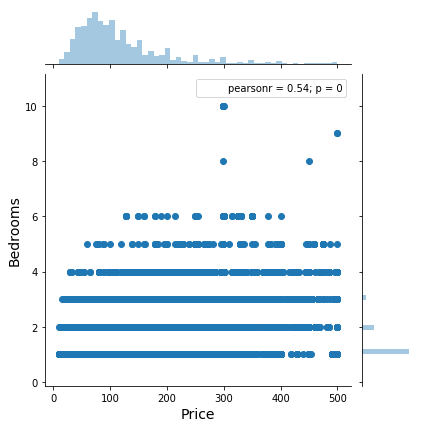

In [35]:
ax1 = fig = sns.jointplot(filtered_result4['price'], filtered_result4['bedrooms'])
ax1 = plt.margins(0.125)
ax1 = fig.set_axis_labels('Price', 'Bedrooms', fontsize=14)
plt.show()

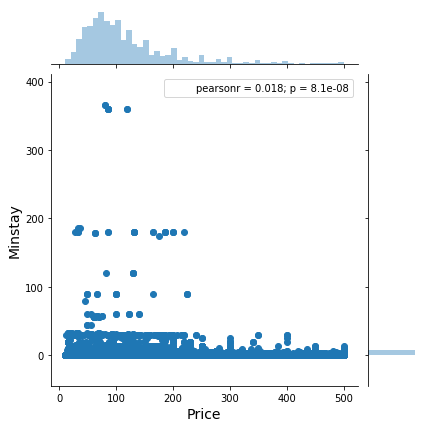

In [36]:
ax3 = fig = sns.jointplot(filtered_result4['price'], filtered_result4['minstay'])
ax3 = plt.margins(0.125)
ax3 = fig.set_axis_labels('Price', 'Minstay', fontsize=14)
plt.show()

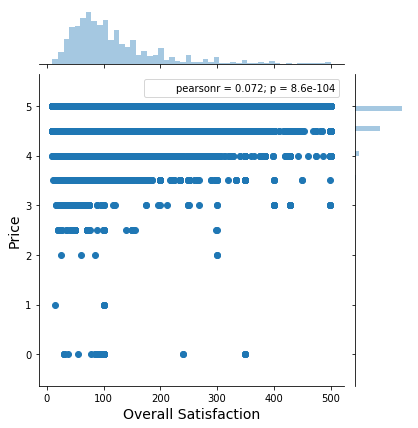

In [37]:
ax4 = fig = sns.jointplot(filtered_result4['price'], filtered_result4['overall_satisfaction'])
ax4 = plt.margins(0.125)
ax4 = fig.set_axis_labels('Overall Satisfaction', 'Price', fontsize=14)
plt.show()

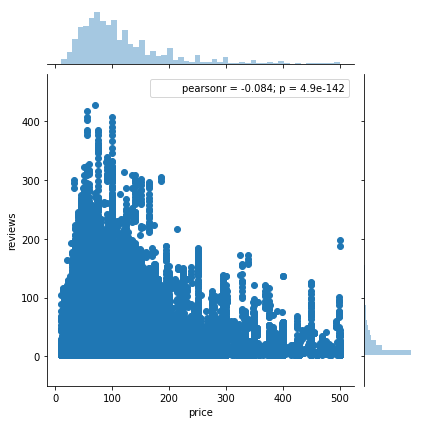

In [38]:

sns.jointplot(filtered_result4['price'], filtered_result4['reviews'])
plt.margins(0.125)
fig.set_axis_labels('Price', 'Reviews', fontsize=14)
plt.show()
